In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [355]:
train_x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']]
train_y = df['quality']

### Splitting dataset training and testing

In [356]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)

In [25]:
X_train.shape

(1071, 10)

In [26]:
X_test.shape

(528, 10)

### Normalizing the dataset

In [357]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

### Classification 

### 1. Logistic Regression

In [168]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.5587121212121212
[[  0   0   2   0   0   0]
 [  0   0  12   6   1   0]
 [  0   0 173  44   0   0]
 [  0   0  96 112   5   0]
 [  0   0   5  55  10   0]
 [  0   0   0   2   5   0]]


### 2. Support Vector Machine

In [169]:
clf = svm.SVC()
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.5890151515151515
[[  0   0   2   0   0   0]
 [  0   0  14   5   0   0]
 [  0   0 167  48   2   0]
 [  0   0  79 125   9   0]
 [  0   0   7  44  19   0]
 [  0   0   0   3   4   0]]


### 3. Linear Regression

In [358]:
clf = LinearRegression()
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

for i in range(len(y_hat)):
    temp = int(y_hat[i])
    if temp+0.5 >= y_hat[i]:
        y_hat[i] = int(y_hat[i])
    else:
        y_hat[i] = int(y_hat[i])+1

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.571969696969697
[[  0   1   1   0   0   0]
 [  0   0  12   7   0   0]
 [  0   0 158  59   0   0]
 [  0   0  69 134  10   0]
 [  0   0   3  57  10   0]
 [  0   0   0   3   4   0]]


### 4. Random Forest

In [197]:
clf = RandomForestClassifier(max_depth=15)
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.6571969696969697
[[  0   0   2   0   0   0]
 [  0   0   9   9   1   0]
 [  0   0 174  39   4   0]
 [  0   0  50 148  15   0]
 [  0   0   4  41  24   1]
 [  0   0   0   2   4   1]]


### 5. K-Nearest Neighbour

In [226]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.5814393939393939
[[  0   0   1   1   0   0]
 [  0   0   9   9   1   0]
 [  0   0 160  54   3   0]
 [  0   0  72 123  18   0]
 [  0   0   4  42  24   0]
 [  0   0   1   2   4   0]]


### 6. Decision Tree

In [229]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.5738636363636364
[[  0   1   0   1   0   0]
 [  0   0  10   8   1   0]
 [  1   8 136  63   9   0]
 [  0   5  47 134  25   2]
 [  0   1   8  26  32   3]
 [  0   0   0   3   3   1]]


### Result Dataframe

In [359]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','SVC', 'Linear Regression', 'Random Forest','KNN', 'Decision Tree'],
    'Score': [0.558,0.589,0.571,0.657,0.581,0.573]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.657,Random Forest
0.589,SVC
0.581,KNN
0.573,Decision Tree
0.571,Linear Regression
0.558,Logistic Regression


### Results
As per the results, Random Forest Classifier performed the best with accuracy of 65.7%.

### Heatmap for feature selection

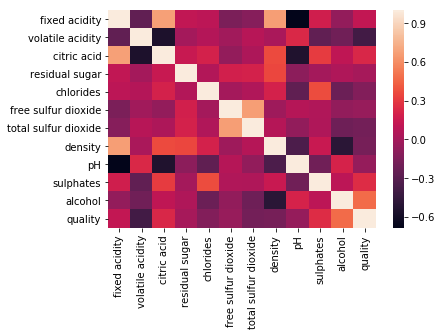

In [345]:
cor = df.corr()
sns.heatmap(cor)

### Creating dataframe after feature selection

In [346]:
train_x = df[['fixed acidity', 'citric acid', 'residual sugar',
             'sulphates', 'alcohol']]
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)

In [285]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

In [347]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.5113636363636364
[[  0   0   2   0   0   0]
 [  0   0  11   8   0   0]
 [  0   0 168  49   0   0]
 [  0   0 112 101   0   0]
 [  0   0  12  57   1   0]
 [  0   0   0   7   0   0]]


In [348]:
clf = svm.SVC()
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.5549242424242424
[[  0   0   1   1   0   0]
 [  0   0   9  10   0   0]
 [  0   0 167  49   1   0]
 [  0   0  89 118   6   0]
 [  0   0   7  55   8   0]
 [  0   0   0   5   2   0]]


In [349]:
clf = LinearRegression()
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

for i in range(len(y_hat)):
    temp = int(y_hat[i])
    if temp+0.5 >= y_hat[i]:
        y_hat[i] = int(y_hat[i])
    else:
        y_hat[i] = int(y_hat[i])+1

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.5340909090909091
[[  0   0   1   1   0   0]
 [  0   0   8  11   0   0]
 [  0   0 150  66   1   0]
 [  0   0  80 125   8   0]
 [  0   0   4  59   7   0]
 [  0   0   0   4   3   0]]


In [350]:
clf = RandomForestClassifier(max_depth=15)
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.6098484848484849
[[  0   0   2   0   0   0]
 [  0   2  11   6   0   0]
 [  0   1 164  51   1   0]
 [  0   1  69 126  17   0]
 [  0   1   6  33  29   1]
 [  0   0   0   2   4   1]]


In [351]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.5151515151515151
[[  0   0   1   1   0   0]
 [  0   0  12   7   0   0]
 [  0   0 155  60   2   0]
 [  0   0  96 101  16   0]
 [  0   0   8  46  16   0]
 [  0   0   0   2   5   0]]


In [352]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
print(accuracy)

mat = confusion_matrix(y_test, y_hat)
print(mat)

0.5662878787878788
[[  0   0   2   0   0   0]
 [  1   2   5   9   2   0]
 [  0   4 132  71  10   0]
 [  0   3  61 124  23   2]
 [  0   1   6  23  38   2]
 [  0   0   0   2   2   3]]


### Results

In [353]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','SVC', 'Linear Regression', 'Random Forest','KNN', 'Decision Tree'],
    'Score': [0.511,0.554,0.534,0.609,0.515,0.566]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.609,Random Forest
0.566,Decision Tree
0.554,SVC
0.534,Linear Regression
0.515,KNN
0.511,Logistic Regression
